In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

68.64983671138896 -119.84369376254759
-5.766018790730612 98.98571407655857
84.24070379062249 -98.80503847944512
-72.38178254131047 -108.966225584583
28.22392512032839 -105.24760131594249
79.88990757694535 89.4081917094449
-21.47550942540606 45.558786257915784
81.07930558456869 -7.231748155791649
-88.87955093599645 17.084210151727603
3.974897134466133 65.45467072389266
-65.87188406765958 -36.76913779862946
16.618592594819972 -119.12311197014014
-56.76728112072469 36.115885042255826
58.14381950664682 176.37222406718604
-37.55181689235244 14.545433778572061
18.989985492452718 -3.7472597335708997
-87.26361986477983 -27.15276189348188
24.293029317500924 101.69389577795141
-51.49144482642201 37.995634153577925
-40.827382033615706 16.56875038336682
-42.475495029492606 148.83349707639212
-62.62804345712384 -12.562297456743636
-65.12552010769718 -91.64142497477717
26.978972503398694 -73.93338641341968
20.937779747173238 -100.83084128637668
-51.661784906288474 153.9048587101256
-9.53320767942575

In [5]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

587

In [7]:
# Import the datetime module from the datetime library.
from datetime import datetime
# Import the requests library.
import requests

In [8]:
# Import the API key.
from config import weather_api_key

In [9]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=75c15f2d8731134439f6a12ada8359df


In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [11]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | norman wells
Processing Record 2 of Set 1 | bengkulu
Processing Record 3 of Set 1 | yellowknife
Processing Record 4 of Set 1 | punta arenas
Processing Record 5 of Set 1 | jimenez
Processing Record 6 of Set 1 | talnakh
Processing Record 7 of Set 1 | beroroha
Processing Record 8 of Set 1 | husavik
Processing Record 9 of Set 1 | bredasdorp
Processing Record 10 of Set 1 | mahibadhoo
Processing Record 11 of Set 1 | ushuaia
Processing Record 12 of Set 1 | cabo san lucas
Processing Record 13 of Set 1 | port alfred
Processing Record 14 of Set 1 | beringovskiy
Processing Record 15 of Set 1 | cape town
Processing Record 16 of Set 1 | araouane
Processing Record 17 of Set 1 | zhoucheng
Processing Record 18 of Set 1 | east london
Processing Record 19 of Set 1 | hermanus
Processing Record 20 of Set 1 | hobart
Processing Record 21 of Set 1 | cockburn town
Processing Record 22 of Set 1 | comonfort
Processing Record 23 of Set 1 | faanui
Processing Record 24 of Set 1 | jam

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Norman Wells,65.2820,-126.8329,33.84,93,90,10.36,CA,2021-09-25 07:45:57
1,Bengkulu,-3.8004,102.2655,82.58,77,88,4.76,ID,2021-09-25 07:47:41
2,Yellowknife,62.4560,-114.3525,45.41,100,20,10.36,CA,2021-09-25 07:43:09
3,Punta Arenas,-53.1500,-70.9167,37.51,87,0,9.22,CL,2021-09-25 07:43:16
4,Jimenez,28.3333,-105.4000,71.42,59,77,4.25,MX,2021-09-25 07:47:41
5,Talnakh,69.4865,88.3972,40.17,52,92,0.40,RU,2021-09-25 07:47:42
6,Beroroha,-21.6667,45.1667,90.95,23,3,9.37,MG,2021-09-25 07:47:42
7,Husavik,66.0449,-17.3389,31.91,86,98,4.94,IS,2021-09-25 07:47:43
8,Bredasdorp,-34.5322,20.0403,60.12,72,51,9.22,ZA,2021-09-25 07:47:43
9,Mahibadhoo,3.7833,72.9667,82.69,74,99,18.72,MV,2021-09-25 07:47:43


In [16]:
new_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Norman Wells,CA,2021-09-25 07:45:57,65.2820,-126.8329,33.84,93,90,10.36
1,Bengkulu,ID,2021-09-25 07:47:41,-3.8004,102.2655,82.58,77,88,4.76
2,Yellowknife,CA,2021-09-25 07:43:09,62.4560,-114.3525,45.41,100,20,10.36
3,Punta Arenas,CL,2021-09-25 07:43:16,-53.1500,-70.9167,37.51,87,0,9.22
4,Jimenez,MX,2021-09-25 07:47:41,28.3333,-105.4000,71.42,59,77,4.25
5,Talnakh,RU,2021-09-25 07:47:42,69.4865,88.3972,40.17,52,92,0.40
6,Beroroha,MG,2021-09-25 07:47:42,-21.6667,45.1667,90.95,23,3,9.37
7,Husavik,IS,2021-09-25 07:47:43,66.0449,-17.3389,31.91,86,98,4.94
8,Bredasdorp,ZA,2021-09-25 07:47:43,-34.5322,20.0403,60.12,72,51,9.22
9,Mahibadhoo,MV,2021-09-25 07:47:43,3.7833,72.9667,82.69,74,99,18.72


In [18]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [19]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

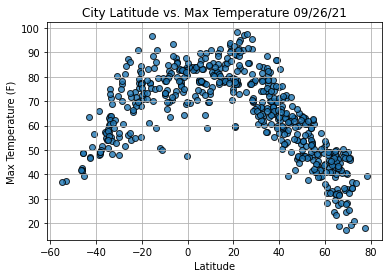

In [20]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

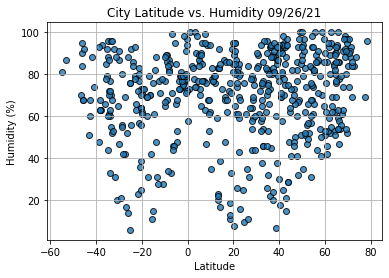

In [21]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

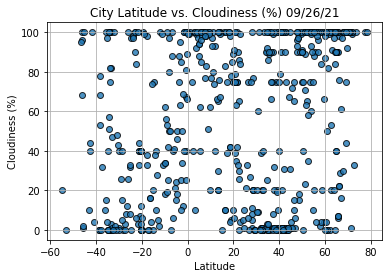

In [22]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

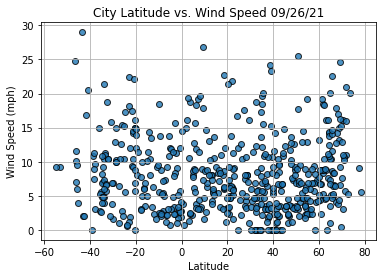

In [23]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()